In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [4]:
df = pd.read_csv('datasets/RSCCASN.csv', parse_dates=True, index_col='DATE')

In [5]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [6]:
df.tail()

,RSCCASN
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
RSCCASN    334 non-null int64
dtypes: int64(1)
memory usage: 5.2 KB


In [8]:
df.columns = ['Sales']

In [9]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


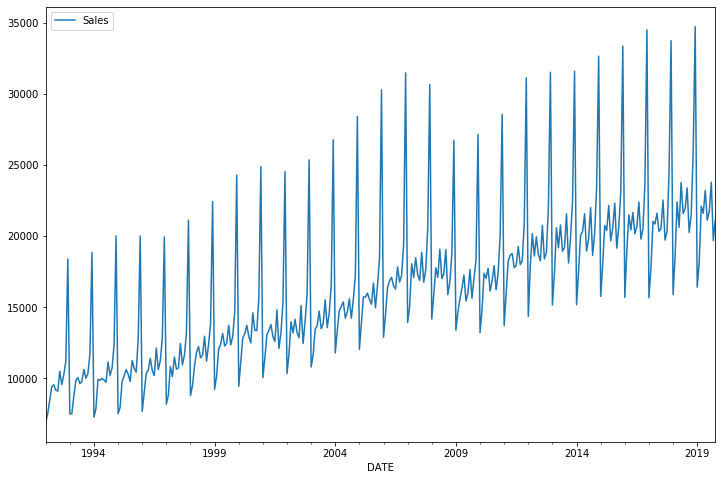

In [10]:
df.plot(figsize=(12, 8))

In [11]:
len(df)

334

In [12]:
df.tail(12)

,Sales
DATE,
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410
2019-02-01,18134
2019-03-01,22093
2019-04-01,21597
2019-05-01,23200
2019-06-01,21123
2019-07-01,21714


In [13]:
test_size = 18

test_index = len(df) - test_size

In [14]:
test_index

316

In [15]:
test_size

18

In [16]:
len(df)

334

In [17]:
train = df.iloc[:test_index]

In [18]:
len(train)

316

In [19]:
test = df.iloc[test_index:]

In [20]:
len(test)

18

In [21]:
train.tail()

,Sales
DATE,
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616


In [22]:
test.head()

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
scaled_train = scaler.transform(train)

In [27]:
scaled_test = scaler.transform(test)

In [28]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [29]:
# Recall that:
len(test)

18

In [30]:
# The length of the batch size should be less than 18

In [31]:
length = 12  # This would be the length of our batches
# source of x points will come from scaled_train, and the source of the y points will come also from scaled_train

In [32]:
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length = length, batch_size=1)

In [33]:
len(generator)

304

In [34]:
X, y = generator[0]

In [35]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [36]:
y

array([[0.02047633]])

In [37]:
X, y = generator[303]

In [38]:
X

array([[[0.50515539],
        [0.53252977],
        [0.48591345],
        [0.49364653],
        [0.56629393],
        [0.46405751],
        [0.48536886],
        [0.63534708],
        [0.97233517],
        [0.32468051],
        [0.42285071],
        [0.5615016 ]]])

In [39]:
y

array([[0.49658728]])

In [40]:
scaled_train[-1]

array([0.49658728])

In [41]:
len(train)

316

In [42]:
X.shape

(1, 12, 1)

In [43]:
X[0]

array([[0.50515539],
       [0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ]])

In [44]:
from tensorflow.keras.models import Sequential

In [45]:
from tensorflow.keras.layers import LSTM, Dense

In [46]:
n_features = 1 # previous sales data

In [47]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [51]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                               length = length, batch_size=1)

In [52]:
model.fit_generator(generator, epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 10s 33ms/step - loss: 0.0263 - val_loss: 0.0060
Epoch 2/20
304/304 [==============================] - 10s 32ms/step - loss: 0.0188 - val_loss: 0.0047
Epoch 3/20
304/304 [==============================] - 10s 33ms/step - loss: 0.0116 - val_loss: 0.0013
Epoch 4/20
304/304 [==============================] - 10s 32ms/step - loss: 0.0050 - val_loss: 0.0061
Epoch 5/20
304/304 [==============================] - 10s 33ms/step - loss: 0.0022 - val_loss: 0.0123


In [53]:
losses = pd.DataFrame(model.history.history)

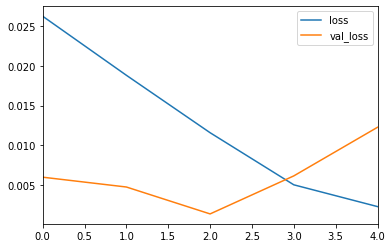

In [54]:
losses.plot()

In [55]:
test_predictions = []

In [56]:
scaled_train[-length:]

array([[0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ],
       [0.49658728]])

In [59]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # Get predictions one time stamp ahead 
    current_prediction = model.predict(current_batch)[0]
    
    # Store the prediction in the list
    test_predictions.append(current_prediction)
    
    # Update the batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:, :], [[current_prediction]], axis=1)

In [60]:
true_predictions = scaler.inverse_transform(test_predictions)

In [61]:
true_predictions[:5]

array([[18308.29738879],
       [17582.27188396],
       [17751.39269042],
       [18971.49721265],
       [17241.17855072]])

In [62]:
test['Predictions'] = true_predictions

/home/student/.env-dl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,18308.297389
2018-06-01,21589,17582.271884
2018-07-01,21919,17751.392690
2018-08-01,23381,18971.497213
2018-09-01,20260,17241.178551
2018-10-01,21473,17686.798844
2018-11-01,25831,20440.085573
2018-12-01,34706,28094.525698
2019-01-01,16410,14643.467367


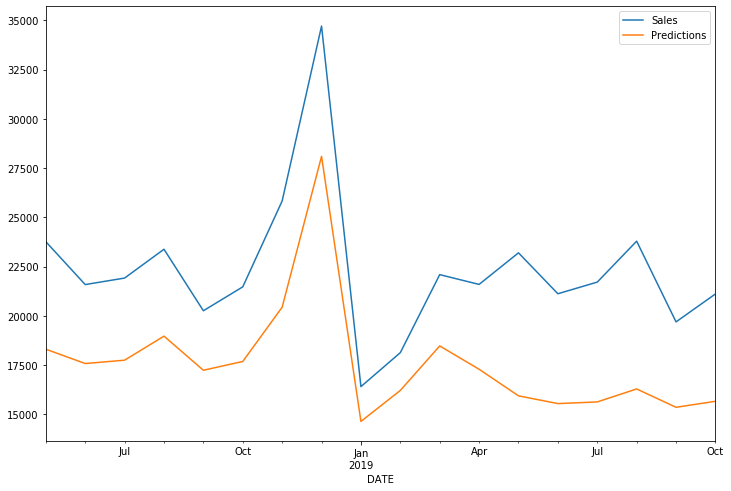

In [64]:
test.plot(figsize=(12, 8))

In [65]:
# Now we are ready to do forecasting using the full dataset

full_scaler = MinMaxScaler()

scaled_full_data = full_scaler.fit_transform(df)

In [66]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, 
                                length=length, batch_size= 1)

In [67]:
# we are not using early stopping here because we are forecasting in the future and we are using the entire dataset,
# we have no validation data set aside.

model2 = Sequential()
model2.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

model2.fit_generator(generator, epochs=8)

Epoch 1/8
322/322 [==============================] - 10s 32ms/step - loss: 0.0281
Epoch 2/8
322/322 [==============================] - 10s 33ms/step - loss: 0.0193
Epoch 3/8
322/322 [==============================] - 11s 33ms/step - loss: 0.0147
Epoch 4/8
322/322 [==============================] - 10s 32ms/step - loss: 0.0088
Epoch 5/8
322/322 [==============================] - 11s 33ms/step - loss: 0.0046
Epoch 6/8
322/322 [==============================] - 11s 33ms/step - loss: 0.0027
Epoch 7/8
322/322 [==============================] - 11s 33ms/step - loss: 0.0024
Epoch 8/8
322/322 [==============================] - 11s 33ms/step - loss: 0.0022


In [68]:
forecast = []

periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # Get predictions one time stamp ahead 
    current_prediction = model.predict(current_batch)[0]
    
    # Store the prediction in the list
    forecast.append(current_prediction)
    
    # Update the batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:, :], [[current_prediction]], axis=1)

In [69]:
forecast = scaler.inverse_transform(forecast)

In [70]:
df.tail()

,Sales
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


In [71]:
forecast

array([[21451.58355188],
       [28989.05306959],
       [15195.218611  ],
       [16255.24426675],
       [18558.19641614],
       [18232.61105657],
       [19220.5696187 ],
       [17835.36493659],
       [18197.17797995],
       [19479.56394291],
       [16851.77014685],
       [17711.06473517]])

In [72]:
# We need to associate the above values with a timestamp.

In [73]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods,
                              freq='MS')

In [74]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [75]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [76]:
forecast_df

,Forecast
2019-11-01,21451.583552
2019-12-01,28989.053070
2020-01-01,15195.218611
2020-02-01,16255.244267
2020-03-01,18558.196416
2020-04-01,18232.611057
2020-05-01,19220.569619
2020-06-01,17835.364937
2020-07-01,18197.177980
2020-08-01,19479.563943


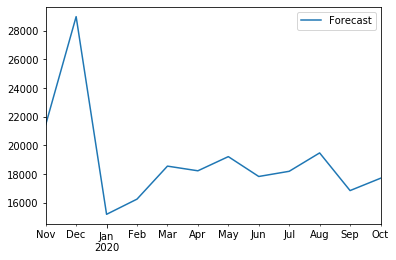

In [77]:
forecast_df.plot()

(576, 611)

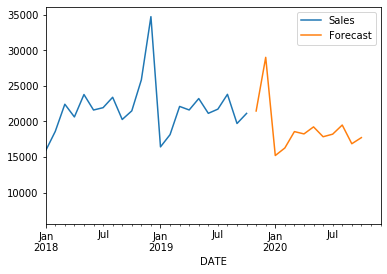

In [78]:
# If you want to plot both the data and forecast we can do this:

ax = df.plot()
forecast_df.plot(ax=ax)
# To zoom in we can do this:
plt.xlim('2018-01-01', '2020-12-01')